#  Calculation of Incident Photon Flux


$$E_{photon} = h\nu=\frac{hc}{\lambda}$$

Photodiode `S120VC` responsivity $$R(\lambda)=\frac{I}{P(\lambda)}$$

At monochromatic irradiation, total incident molar photon flux is calculated as

$$q_0=\frac{P(\lambda)}{N_A E_{photon}(\lambda)}=\frac{P(\lambda) \lambda}{N_Ahc} = \frac{I \lambda}{N_Ahc R(\lambda)} = I \times q_{rel}(\lambda)$$

$$q_{rel}(\lambda) = \frac{\lambda}{N_Ahc R(\lambda)}$$


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c

In [54]:
# works only in colab
! wget https://raw.githubusercontent.com/George-Gershwin/Jupyter-Tutorials/master/Google%20colab/Responsivity-S120VC.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
responsivity = np.loadtxt('Responsivity-S120VC.txt', skiprows=1, delimiter='\t')
responsivity  # first column contains wavelenths, second responsivity in Amp / W

array([[2.000e+02, 9.330e-03],
       [2.010e+02, 9.346e-03],
       [2.020e+02, 9.362e-03],
       ...,
       [1.098e+03, 9.346e-03],
       [1.099e+03, 9.128e-03],
       [1.100e+03, 8.910e-03]])

### Responsivity

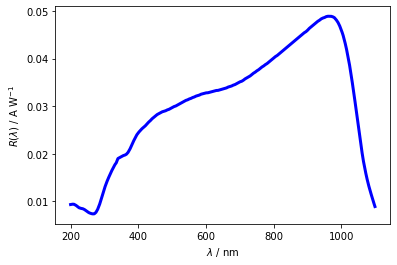

In [56]:
plt.plot(responsivity[:, 0], responsivity[:, 1], lw=3, color='blue')
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$R(\lambda)$ / A W$^{-1}$')
plt.show()

### $q_{rel}$ calculation

$$q_{rel}(\lambda) = \frac{\lambda}{N_Ahc R(\lambda)}$$

In [57]:
# used constants
print(f'Avogadro constant: {c.N_A}')
print(f'Planck constant: {c.h}')
print(f'Speed of light: {c.c}')

Avogadro constant: 6.02214076e+23
Planck constant: 6.62607015e-34
Speed of light: 299792458.0


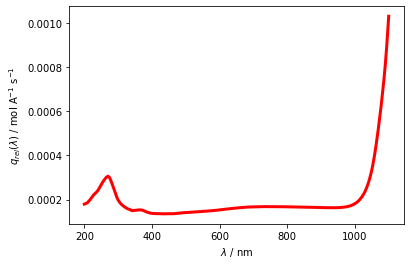

In [58]:
wls = responsivity[:, 0] * 1e-9  # conversion to meters
q_rel = wls / (c.N_A * c.h * c.c * responsivity[:, 1])

plt.plot(responsivity[:, 0], q_rel, lw=3, color='red')
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$q_{rel}(\lambda)$ / mol A$^{-1}$ s$^{-1}$')
plt.show()

## $q_0$ calculation

$$q_0 = I \times q_{rel}(\lambda_{irr})$$

In [59]:
irr_wavelength = 336 # 336 nm
q_rel_at_irr = q_rel[int(irr_wavelength - responsivity[0, 0])]

I = 23.3e-6  # 23.3 uA 
q0 = I * q_rel_at_irr

print(f'q0 = {q0:0.3g}')

q0 = 3.58e-09
